## Part 0: Data Import & Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator

In [2]:
df = pd.read_excel('medium_performance_data.xlsx')

In [3]:
df.head()

,dates,title,view,additional_view,read,read_ratio,fans
0,2016-09-01,從【雲係麼個色】看王嘉明的末日史觀與那場大爆炸的眾多轟鳴,4,0,2,0.50,0
1,2016-10-24,看蔡柏璋的Solo Date，以及科技框限住的冰冷二元,17,0,8,0.47,0
2,2016-12-03,[創作] 酒之飲喻,4,0,3,0.75,0
3,2016-12-03,[創作] 去，回,4,0,2,0.50,0
4,2016-12-03,[創作] 在掩卷巴黎中，遇見,6,0,4,0.67,0


In [4]:
df.dtypes

dates              datetime64[ns]
title                      object
view                        int64
additional_view             int64
read                        int64
read_ratio                float64
fans                        int64
dtype: object

In [5]:
df.shape

(45, 7)

## Part 1: Dashboard & Visualization Product 

### Function 0 : Translation issue (from Chinese to English)

In [7]:
def translate(df):
    import numpy as np
    import matplotlib.pyplot as plt
    from googletrans import Translator
    
    translator = Translator()
    df['title'] =  df["title"].map(lambda x: translator.translate(x, src="zh-TW", dest="en").text)
    return df

### Function 1: total view of Medium post

In [8]:
def total_view(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    total_view = df['view'].sum() + df['additional_view'].sum()
    return 'The total view of your medium post is {}'.format(total_view)

In [10]:
total_view('medium_performance_data.xlsx')

'The total view of your medium post is 15086'

### Function 2: top 5 articles with most views

In [20]:
def top_view(file):
    import pandas as pd

    df = pd.read_excel(file)
    df = translate(df)
    top_view = df.nlargest(5, 'view')[['title','view']]
    ax = top_view.plot.barh(x='title', y='view')
    return display(top_view) , ax

,title,view
12,[US Business Analysis Master Application] 1. P...,4600
13,[US Business Analysis Master Application] 2. S...,2300
11,[US Business Analysis Master Application] 0. G...,775
32,Web Scraping H1B Salary DB (I): Exploring Busi...,684
26,Hidden Beneath Texts: Analytics of Jack Ma’ Re...,674


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf47bcc0>)

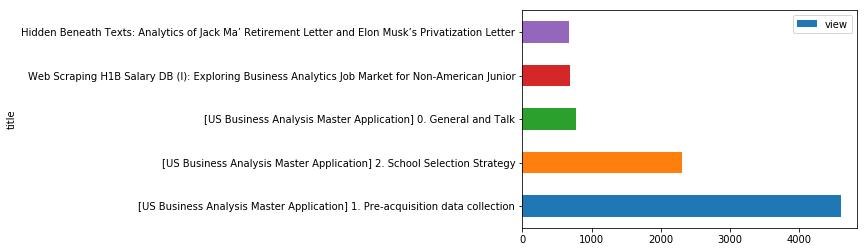

In [21]:
top_view('medium_performance_data.xlsx')

### Function 3: top 5 articles with most additional view

In [22]:
def top_additional_view(file):
    import pandas as pd

    df = pd.read_excel(file)
    df = translate(df)
    top_view = df.nlargest(5, 'additional_view')[['title','additional_view']]
    top_view = top_view[top_view['additional_view']>0]
    ax = top_view.plot.barh(x='title', y='additional_view')
    return display(top_view) , ax

,title,additional_view
26,Hidden Beneath Texts: Analytics of Jack Ma’ Re...,188
29,Useful Tools for Detecting Earning Manipulatio...,185


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf4dfa58>)

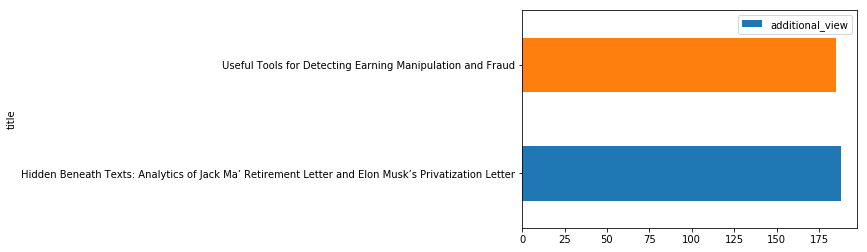

In [23]:
top_additional_view('medium_performance_data.xlsx')

### Function 4: top 5 articles with most reads

In [24]:
def top_read(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    top_read = df.nlargest(5, 'read')[['title','read']]
    top_read = top_read[top_read['read']>0]
    ax = top_read.plot.barh(x='title', y='read')
    return display(top_read) , ax

,title,read
12,[US Business Analysis Master Application] 1. P...,2600
13,[US Business Analysis Master Application] 2. S...,1300
11,[US Business Analysis Master Application] 0. G...,614
37,[UMN MSBA] Fall semester half-semester course ...,361
24,[US Business Analysis Master Application] 3. S...,334


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf4df2b0>)

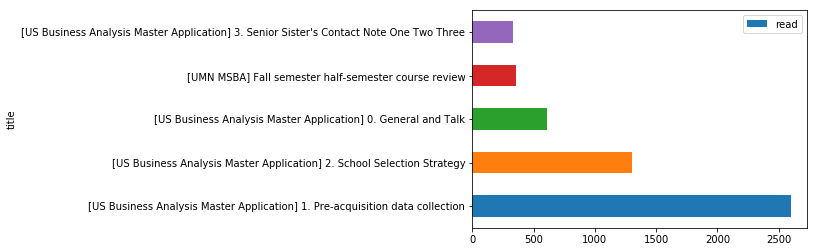

In [25]:
top_read('medium_performance_data.xlsx')

### Function 5: top 5 articles with most read ratio

In [26]:
def top_readratio(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    top_read = df.nlargest(5, 'read_ratio')[['title','read_ratio']]
    top_read = top_read[top_read['read_ratio']>0]
    ax = top_read.plot.barh(x='title', y='read_ratio')
    return display(top_read) , ax

,title,read_ratio
10,Website Analyst Growth Diary #1 | How the digi...,0.85
11,[US Business Analysis Master Application] 0. G...,0.79
2,[Creation],0.75
19,[UMN MSBA] A lesson in the most recent SARS in...,0.75
21,[UMN MSBA] Summer semester half-semester cours...,0.75


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf5afa20>)

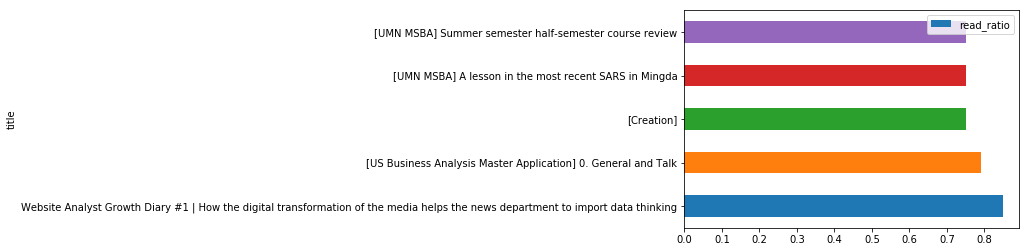

In [27]:
top_readratio('medium_performance_data.xlsx')

### Function 6:  average read ratio of Medium post

In [11]:
def avg_readratio(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    avg_rr = round(df.read_ratio.mean(),3)
    return 'The avg. read ratio of your medium post is {}'.format(avg_rr)

In [12]:
avg_readratio('medium_performance_data.xlsx')

'The avg. read ratio of your medium post is 0.528'

### Function 7 :  top 5 articles with most fans 

In [30]:
def top_fans(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    top_read = df.nlargest(5, 'fans')[['title','fans']]
    top_read = top_read[top_read['fans']>0]
    ax = top_read.plot.barh(x='title', y='fans')
    return display(top_read) , ax

,title,fans
12,[US Business Analysis Master Application] 1. P...,57
13,[US Business Analysis Master Application] 2. S...,38
37,[UMN MSBA] Fall semester half-semester course ...,17
32,Web Scraping H1B Salary DB (I): Exploring Busi...,13
17,[UMN MSBA] Experience Sharing: How to find int...,12


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf62b3c8>)

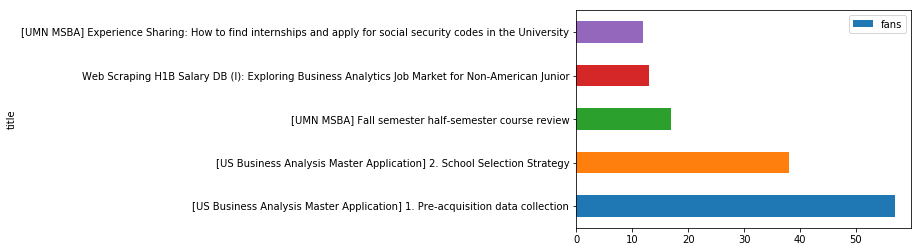

In [31]:
top_fans('medium_performance_data.xlsx')

### Function 8:   Average view through the days elapsed

In [32]:
def top_view_per_day(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    df['time_elapse'] =pd.datetime.now().date() - df['dates']
    df['time_elapse'] = df['time_elapse'].dt.days
    df['total_view'] = df['view'] + df['additional_view']
    df['view_per_day']  = round(df['total_view'] / df['time_elapse'], 2)
    
    top_read = df.nlargest(5, 'view_per_day')[['title','view_per_day']]
    top_read = top_read[top_read['view_per_day']>0]
    ax = top_read.plot.barh(x='title', y='view_per_day')
    return display(top_read) , ax

,title,view_per_day
12,[US Business Analysis Master Application] 1. P...,15.18
37,[UMN MSBA] Fall semester half-semester course ...,7.83
13,[US Business Analysis Master Application] 2. S...,7.64
32,Web Scraping H1B Salary DB (I): Exploring Busi...,7.05
26,Hidden Beneath Texts: Analytics of Jack Ma’ Re...,6.53


(None, <matplotlib.axes._subplots.AxesSubplot at 0x21ddf68c7f0>)

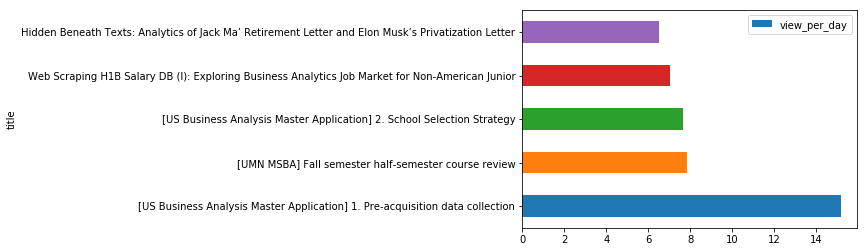

In [33]:
top_view_per_day('medium_performance_data.xlsx')

## Part 2: Clustering Product

###  Function 9: Munging Data Function (Helper Function)

In [18]:
def medium_data_munge(file):
    import pandas as pd
    
    df = pd.read_excel(file)
    df = translate(df)
    df['time_elapse'] =pd.datetime.now().date() - df['dates']
    df['time_elapse'] = df['time_elapse'].dt.days
    df['total_view'] = df['view'] + df['additional_view']
    df['view_per_day']  = round(df['total_view'] / df['time_elapse'], 2)
    return df

In [37]:
medium_data_munge("medium_performance_data.xlsx").head()

,dates,title,view,additional_view,read,read_ratio,fans,time_elapse,total_view,view_per_day
0,2016-09-01,Looking at Wang Jiaming's doomsday history and...,4,0,2,0.50,0,874,4,0.00
1,2016-10-24,"Look at Cai Bo's Solo Date, and the cold binar...",17,0,8,0.47,0,821,17,0.02
2,2016-12-03,[Creation],4,0,3,0.75,0,781,4,0.01
3,2016-12-03,[creation] go back,4,0,2,0.50,0,781,4,0.01
4,2016-12-03,"[Creation] In the cover of Paris, meet",6,0,4,0.67,0,781,6,0.01


### Clustering

### Function 10: Create Cluster Dataframe Function

In [15]:
def create_cluster_df(file, n):
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    
    df = medium_data_munge(file)
    
    # Select proper feature
    features = ['read','read_ratio','fans','total_view','view_per_day']
    x = df.loc[:, features].values
    
    # Normalized data 
    x = StandardScaler().fit_transform(x) 
    
    # Conduct K-mean
    km = KMeans(n_clusters = n, random_state=0)
    km.fit(x)
    labels = km.labels_
    cluster = labels.tolist()
    
    final_cluster = pd.DataFrame(dict(cluster_label = cluster, title = df['title']))
    df_new = pd.merge(df, final_cluster, how = 'left', on = ['title'])
    
    return df_new

### Function 11: Create Cluster Description Function

In [16]:
def cluster_df_desc(file, n):
    # create dataframe with cluster label
    df_new = create_cluster_df(file, n)
    
    # summarize the clustered dataframe
    col = ['cluster_label', 'total_view' , 'read', 'read_ratio', 'fans','view_per_day']
    final_df = df_new[col].groupby(['cluster_label']).agg({'cluster_label' : 'size', \
                                                                                                      'total_view': lambda x:x.mean(), \
                                                                                                       'read': lambda x: x.mean(), \
                                                                                                       'read_ratio': lambda x: x.mean(), \
                                                                                                       'fans': lambda x:x.mean(), \
                                                                                                         'view_per_day': lambda x:x.mean()})
    return display(final_df)    

In [40]:
create_cluster_df("medium_performance_data.xlsx", 3).head()

,dates,title,view,additional_view,read,read_ratio,fans,time_elapse,total_view,view_per_day,cluster_label
0,2016-09-01,Looking at Wang Jiaming's doomsday history and...,4,0,2,0.50,0,874,4,0.00,2
1,2016-10-24,"Look at Cai Bo's Solo Date, and the cold binar...",17,0,8,0.47,0,821,17,0.02,2
2,2016-12-03,[Creation],4,0,3,0.75,0,781,4,0.01,0
3,2016-12-03,[creation] go back,4,0,2,0.50,0,781,4,0.01,2
4,2016-12-03,"[Creation] In the cover of Paris, meet",6,0,4,0.67,0,781,6,0.01,0


In [24]:
cluster_df_desc("medium_performance_data.xlsx",3)

,cluster_label,total_view,read,read_ratio,fans,view_per_day
cluster_label,,,,,,
0,20,215.80000,147.550000,0.671500,4.350000,1.373
1,2,3450.00000,1950.000000,0.575000,47.500000,11.335
2,23,168.26087,61.695652,0.399565,3.217391,1.660


In [25]:
cluster_df_desc("medium_performance_data.xlsx",5)

,cluster_label,total_view,read,read_ratio,fans,view_per_day
cluster_label,,,,,,
0,19,195.00,136.315789,0.675789,3.684211,1.043158
1,20,85.65,35.600000,0.401000,2.250000,0.971500
2,4,692.00,267.000000,0.440000,11.500000,6.597500
3,1,2300.00,1300.000000,0.580000,38.000000,7.590000
4,1,4600.00,2600.000000,0.570000,57.000000,15.080000


### PCA for Data visualization

### Function 12: PCA Visualization Function

In [13]:
def pca_vis(file, n):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    df_new = create_cluster_df(file, n)
    
    # Select proper feature
    features = ['read','read_ratio','fans','total_view','view_per_day']
    x = df_new.loc[:, features].values
    
    # Normalized data 
    x = StandardScaler().fit_transform(x) 
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    
    finalDf = pd.concat([principalDf, df_new[['cluster_label']]], axis = 1)
    
    # plot the PCA two-dimensional graph
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 13)
    ax.set_ylabel('Principal Component 2', fontsize = 13)
    ax.set_title('2 component PCA', fontsize = 15)
    targets = list(range(0,n))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    colors =  colors[:n]

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['cluster_label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                         , finalDf.loc[indicesToKeep, 'principal component 2']
                         , c = color
                         , s = 50)
    ax.legend(targets)
    ax.grid()
    
    return 'The explained ratio for component 1 is {0:.2f} and for component 2 is {1:.2f}'. \
                   format(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1] ) 

'The explained ratio for component 1 is 0.76 and for component 2 is 0.20'

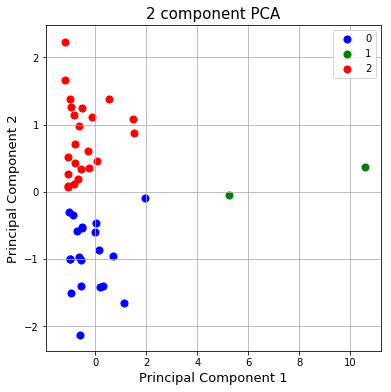

In [26]:
pca_vis("medium_performance_data.xlsx",3)

'The explained ratio for component 1 is 0.76 and for component 2 is 0.20'

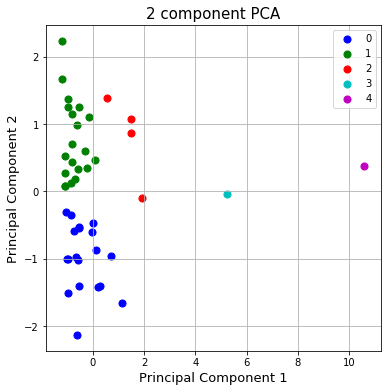

In [27]:
pca_vis("medium_performance_data.xlsx",5)

#### Previous Trial Code on function 12

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [182]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [213]:
finalDf = pd.concat([principalDf, df_new[['cluster_label']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster_label
0,-1.071421,0.074316,2
1,-1.065430,0.265325,2
2,-0.958068,-1.510334,0
3,-1.069808,0.074832,2
4,-0.990885,-1.003164,0


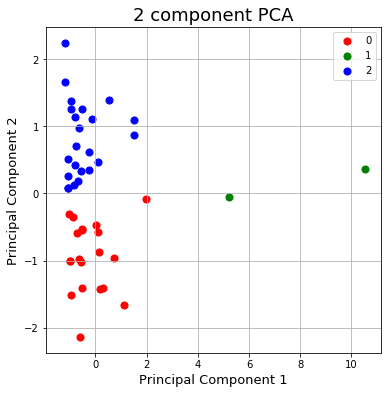

In [195]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 13)
ax.set_ylabel('Principal Component 2', fontsize = 13)
ax.set_title('2 component PCA', fontsize = 18)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster_label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [197]:
pca.explained_variance_ratio_

array([0.75245544, 0.20101529])

###  Parallel Coordinates

### Function 13: Parallel Coordinates Function

In [21]:
def parallel_coordinates(file, n):
    df_new = create_cluster_df(file, n)
    
    cols = ['total_view', 'read', 'read_ratio', 'fans', 'view_per_day' ]
    df_new_sub = df_new[cols]
    
    from sklearn.preprocessing import StandardScaler
    from pandas.plotting import parallel_coordinates
    
    ss = StandardScaler()

    scaled_df = ss.fit_transform(df_new_sub)
    scaled_df = pd.DataFrame(scaled_df, columns=cols)
    final_df = pd.concat([scaled_df, df_new['cluster_label']], axis=1)
    
    parallel_coordinates(final_df, "cluster_label")
    plt.title("Parallel Coordinates Graph on Each Metric")
    plt.show()

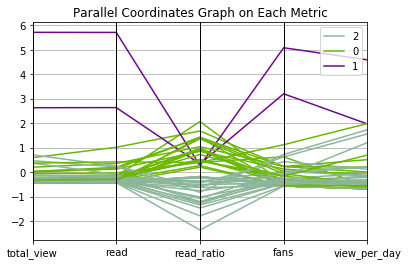

In [23]:
parallel_coordinates("medium_performance_data.xlsx", 3)

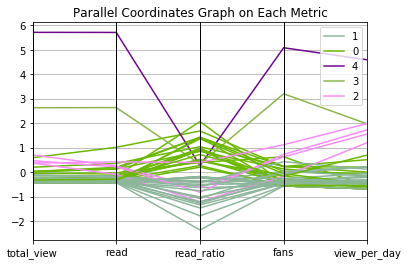

In [28]:
parallel_coordinates("medium_performance_data.xlsx", 5)

#### Previous Trial Code

In [202]:
cols = ['total_view', 'read', 'read_ratio', 'fans', 'view_per_day' ]
df_new_sub = df_new[cols]

In [203]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(df_new_sub)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df_new['cluster_label']], axis=1)
final_df.head()

,total_view,read,read_ratio,fans,view_per_day,cluster_label
0,-0.443844,-0.429614,-0.181348,-0.563674,-0.697658,2
1,-0.426425,-0.415433,-0.374119,-0.563674,-0.690843,2
2,-0.443844,-0.427250,1.425080,-0.563674,-0.694251,0
3,-0.443844,-0.429614,-0.181348,-0.563674,-0.694251,2
4,-0.441164,-0.424887,0.911023,-0.563674,-0.694251,0


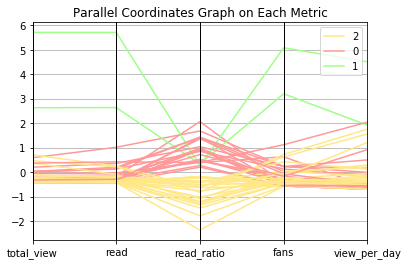

In [212]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(final_df, "cluster_label", color=('#FFE888', '#FF9999', '#9dff88'))
plt.title("Parallel Coordinates Graph on Each Metric")
plt.show()